In [16]:
import numpy as np
import cv2
from scipy import signal
from scipy.io import wavfile
from scipy.ndimage import gaussian_filter1d, gaussian_filter, convolve
import matplotlib.pyplot as plt
from skimage import io, color, filters
from PIL import Image

image = io.imread('building.jpg')
gray_image = color.rgb2gray(image)

C:\Users\tiffy\AppData\Local\Temp\ipykernel_448\479584464.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read('file_example_WAV_1MG.wav')


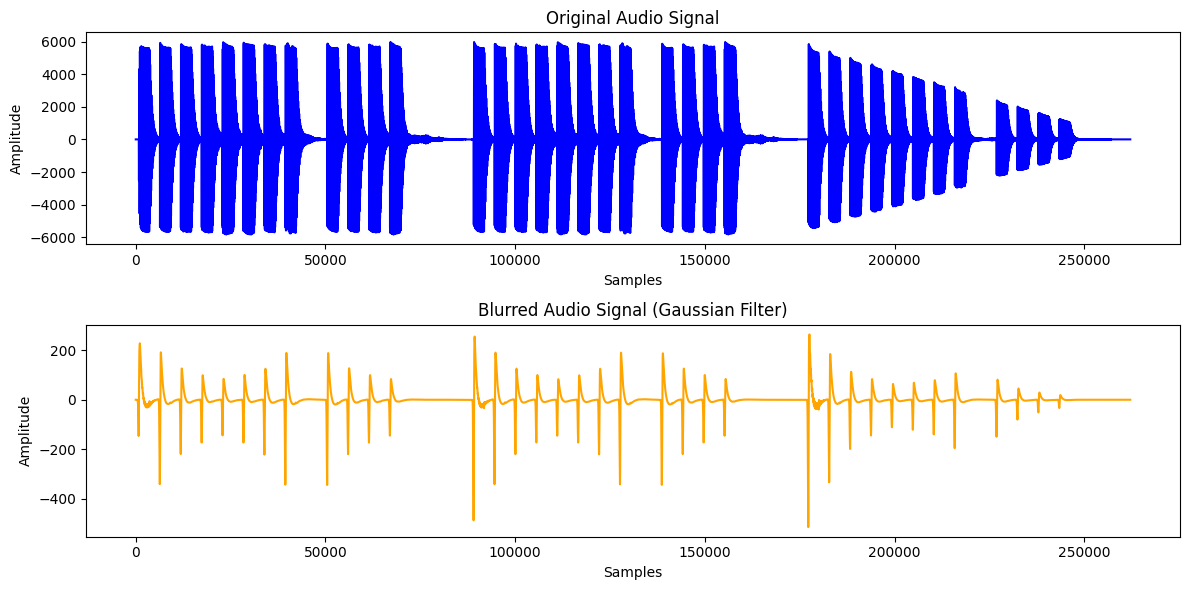

In [23]:
# 1. Perform 1D convolution on an audio signal. 

# Load the audio file
sample_rate, audio_data = wavfile.read('file_example_WAV_1MG.wav')

# If stereo, convert to mono by averaging channels
if len(audio_data.shape) == 2:
    audio_data = np.mean(audio_data, axis=1)

# Apply Gaussian blur to the audio data with a specified sigma
sigma = 100  # Adjust sigma for more or less blurring
blurred_audio = gaussian_filter1d(audio_data, sigma=sigma)

# Save the blurred audio to a new file
wavfile.write('blurred_audio.wav', sample_rate, blurred_audio.astype(np.int16))

# Plot original and blurred audio waveforms for comparison
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(audio_data, color='blue')
plt.title('Original Audio Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(blurred_audio, color='orange')
plt.title('Blurred Audio Signal (Gaussian Filter)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

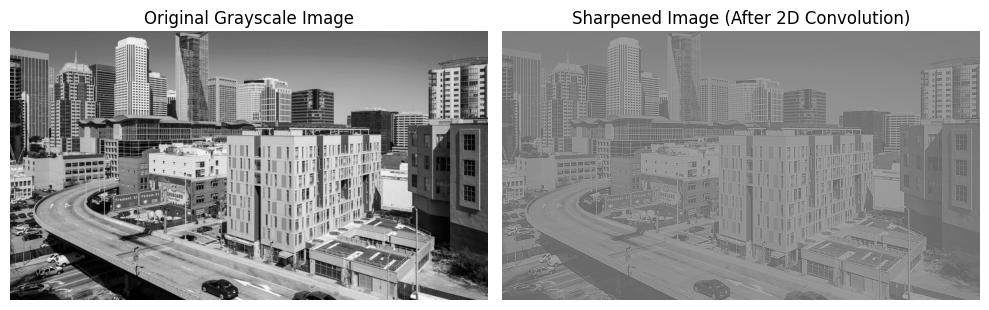

In [2]:
# 2. Apply 2D convolution on a grayscale image using a sharpening filter
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage import io, color, filters


# Load an example grayscale image (convert from color to grayscale if necessary)
image = io.imread('building.jpg') #Import image
gray_image = color.rgb2gray(image)

# Define a sharpening kernel (2D convolution filter)
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Perform 2D convolution using the sharpening filter
convolved_image = signal.convolve2d(gray_image, sharpening_kernel, mode='same', boundary='symm')

# Plot the original and convolved grayscale images
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Sharpened Image (After 2D Convolution)')
plt.axis('off')

plt.tight_layout()
plt.show()

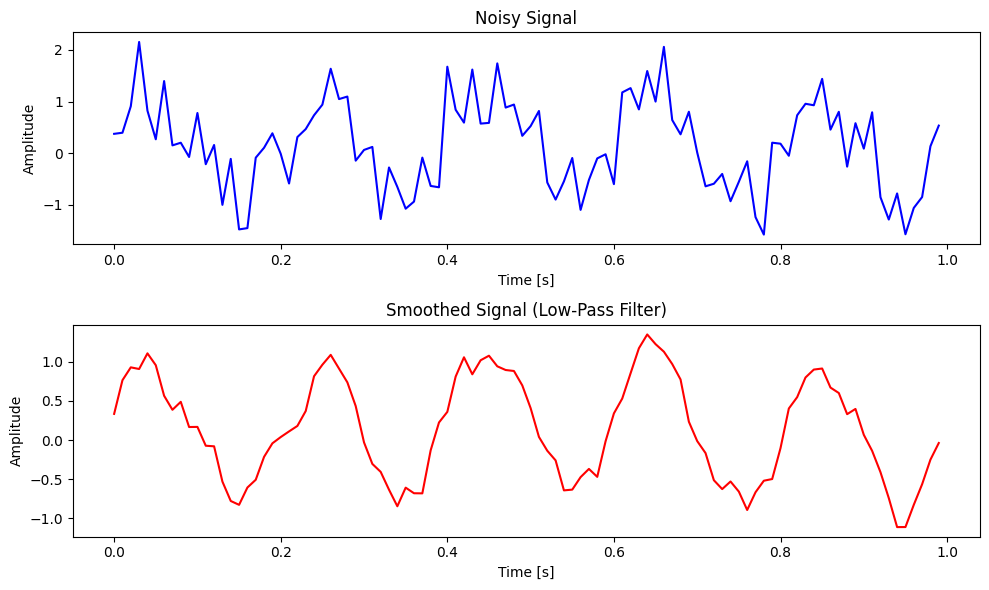

In [18]:
# 3. Perform 1D convolution with a low-pass filter on noisy data
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Assume sine_wave and t are already defined here
noisy_signal = sine_wave + 0.5 * np.random.randn(len(sine_wave))

# Define a low-pass filter (e.g., a moving average filter)
low_pass_filter = np.ones(5) / 5

# Perform 1D convolution with low-pass filter
smoothed_signal = signal.convolve(noisy_signal, low_pass_filter, mode='same')

# Plot the noisy and smoothed signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal, color='blue')
plt.title('Noisy Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t, smoothed_signal, color='red')
plt.title('Smoothed Signal (Low-Pass Filter)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

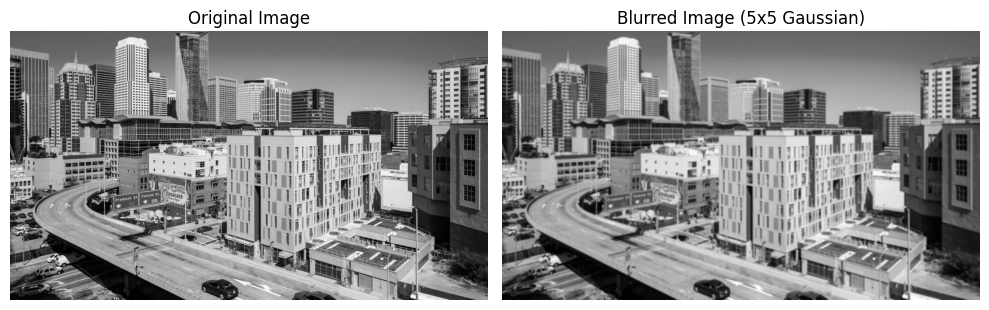

In [11]:
#4 - Blurring an image using a Gaussian Kernel

# Step 1: Load a grayscale image
image_path = 'building.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Define a 5x5 Gaussian kernel
kernel_size = (5, 5)
sigma = 1.5
blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)

# Plot the original and blurred images
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image (5x5 Gaussian)")
plt.axis("off")

plt.tight_layout()
plt.show()

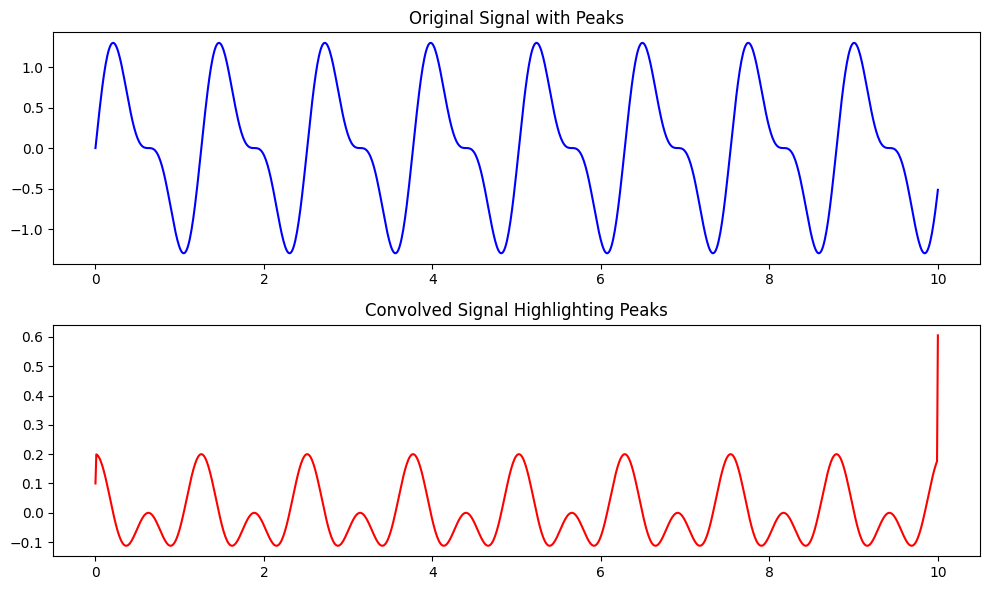

In [12]:
#5 - 1D Convolution to Detect Peaks in a Signal

# Step 1: Create a sample signal with peaks
t = np.linspace(0, 10, 1000)
signal_data = np.sin(5 * t) + 0.5 * np.sin(10 * t)  # Composite signal with peaks

# Step 2: Define a peak detection kernel
kernel = np.array([1, 0, -1])

# Step 3: Apply 1D convolution
convolved_signal = np.convolve(signal_data, kernel, mode='same')

# Plot the original and convolved signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal_data, label="Original Signal", color='blue')
plt.title("Original Signal with Peaks")
plt.subplot(2, 1, 2)
plt.plot(t, convolved_signal, label="Convolved Signal (Peak Detection)", color='red')
plt.title("Convolved Signal Highlighting Peaks")
plt.tight_layout()
plt.show()

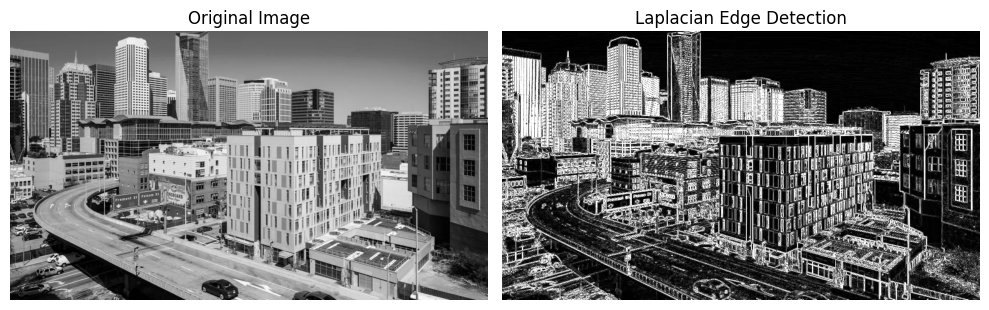

In [18]:
#5
# Step 1: Load a grayscale image
image_path = 'building.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Apply the Laplacian filter using OpenCV
laplacian_edge = cv2.Laplacian(image, cv2.CV_64F, ksize=3)  # 3x3 kernel

# Convert to an 8-bit absolute value (required for display purposes)
laplacian_edge = cv2.convertScaleAbs(laplacian_edge)

# Plot the original and edge-detected images
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(laplacian_edge, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

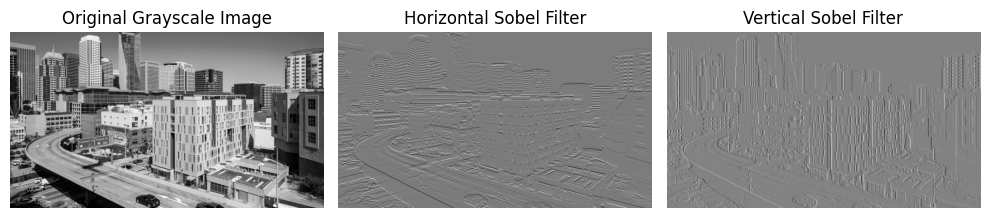

In [20]:
# 7. Horizontal and Vertical Sobel Filter

# Apply a horizontal Sobel filter on an image
sobel_horizontal = filters.sobel_h(gray_image)
sobel_vertical = filters.sobel_v(gray_image)

# Plot the result of horizontal Sobel filter
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_horizontal, cmap='gray')
plt.title('Horizontal Sobel Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_vertical, cmap='gray')
plt.title('Vertical Sobel Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

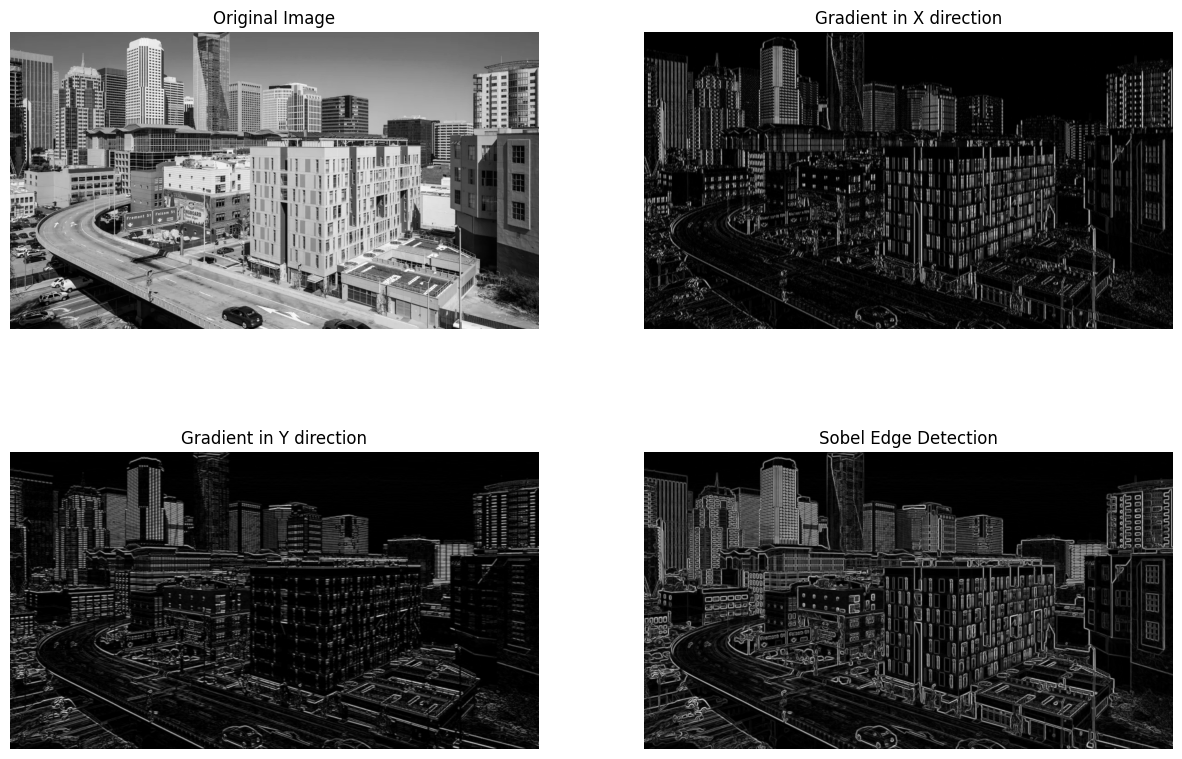

In [21]:
#8. Sobel Edge Detection with Gradient in X and Y direction
# Apply Gaussian smoothing (optional)
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

# Sobel operators
Gx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

# Gradient magnitude
G = np.sqrt(Gx**2 + Gy**2)

# Normalize to range 0-255
Gx = np.uint8(255 * np.abs(Gx) / np.max(Gx))
Gy = np.uint8(255 * np.abs(Gy) / np.max(Gy))
G = np.uint8(255 * G / np.max(G))

# Display the results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gradient in X direction
plt.subplot(2, 2, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')

# Gradient in Y direction
plt.subplot(2, 2, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')

# Edge-detected image
plt.subplot(2, 2, 4)
plt.imshow(G, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()

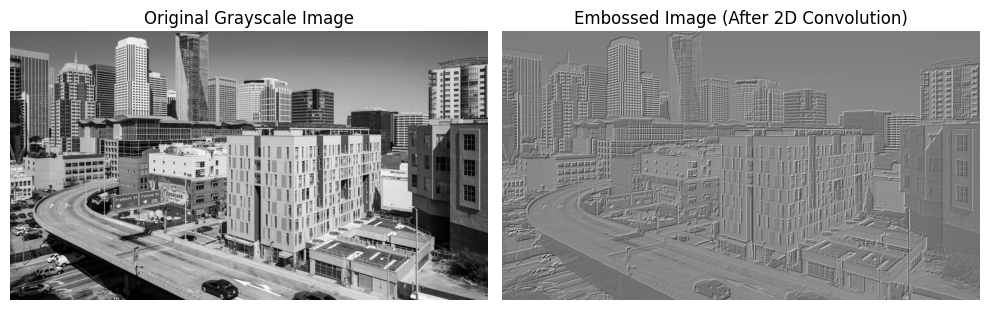

In [24]:
# 9. Embossed Image

#Perform 2D convolution with an emboss filter on an image

# Define an emboss kernel (2D convolution filter)
emboss_kernel = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])

# Perform 2D convolution using the emboss filter
embossed_image = signal.convolve2d(gray_image, emboss_kernel, mode='same', boundary='symm')

# Plot original and embossed images
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(embossed_image, cmap='gray')
plt.title('Embossed Image (After 2D Convolution)')
plt.axis('off')

plt.tight_layout()
plt.show()

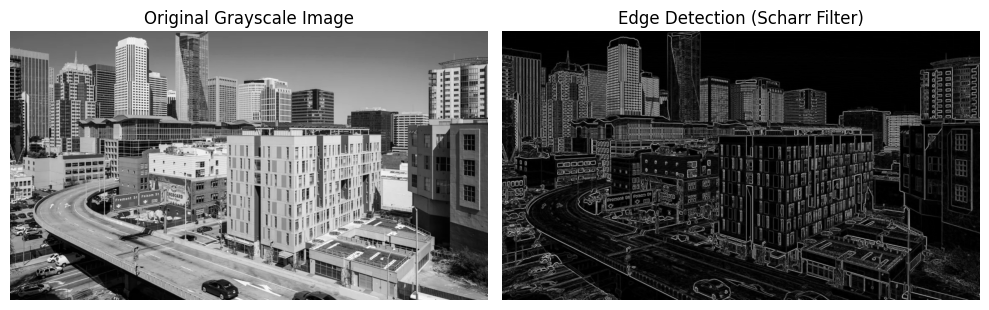

In [25]:
# 10. Scharr filter for edge detection

#Apply Scharr filter for edge detection (2D convolution)
# Scharr filter is a more accurate edge detection filter than Sobel for gradients

# Perform edge detection using Scharr filter
edges_scharr = filters.scharr(gray_image)

# Plot the edge-detected image using Scharr filter
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges_scharr, cmap='gray')
plt.title('Edge Detection (Scharr Filter)')
plt.axis('off')

plt.tight_layout()
plt.show()